<a href="https://colab.research.google.com/github/jamissonfreitas/IN1167/blob/master/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import io
import requests
# lib to plot the data
import matplotlib.pyplot as plt
# lib to use the decompositio in the time series
from statsmodels.tsa.seasonal import seasonal_decompose
# lib to use the acf and pcf correlations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# lib to organize the data in data frame
from pandas import DataFrame
# lib to organize the time series by periods
from pandas import TimeGrouper

# Monthly Sunspots

This dataset describes a monthly count of the number of observed sunspots for just over 230 years (1749-1983).

The units are a count and there are 2,820 observations. The source of the dataset is credited to Andrews & Herzberg (1985)

In [21]:
url='https://raw.githubusercontent.com/jamissonfreitas/IN1167/master/monthly-sunspots.csv'
data = requests.get(url).content
data = data.decode('utf-8').replace("\"","").split('\n')
data = [d.strip().split(',') for d in data][1:-1]
data[:5]

[['1749-01', '58.0'],
 ['1749-02', '62.6'],
 ['1749-03', '70.0'],
 ['1749-04', '55.7'],
 ['1749-05', '85.0']]

In [24]:
df = pd.DataFrame(
    data, 
    columns=['Month', 'Sunspots']
) 
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m', errors='coerce')
df = df.set_index(df['Month'])
serie = df['Sunspots']
serie

Month
1749-01-01     58.0
1749-02-01     62.6
1749-03-01     70.0
1749-04-01     55.7
1749-05-01     85.0
1749-06-01     83.5
1749-07-01     94.8
1749-08-01     66.3
1749-09-01     75.9
1749-10-01     75.5
1749-11-01    158.6
1749-12-01     85.2
1750-01-01     73.3
1750-02-01     75.9
1750-03-01     89.2
1750-04-01     88.3
1750-05-01     90.0
1750-06-01    100.0
1750-07-01     85.4
1750-08-01    103.0
1750-09-01     91.2
1750-10-01     65.7
1750-11-01     63.3
1750-12-01     75.4
1751-01-01     70.0
1751-02-01     43.5
1751-03-01     45.3
1751-04-01     56.4
1751-05-01     60.7
1751-06-01     50.7
              ...  
1981-07-01    143.8
1981-08-01    158.7
1981-09-01    167.3
1981-10-01    162.4
1981-11-01    137.5
1981-12-01    150.1
1982-01-01    111.2
1982-02-01    163.6
1982-03-01    153.8
1982-04-01    122.0
1982-05-01     82.2
1982-06-01    110.4
1982-07-01    106.1
1982-08-01    107.6
1982-09-01    118.8
1982-10-01     94.7
1982-11-01     98.1
1982-12-01    127.0
1983-01-01    

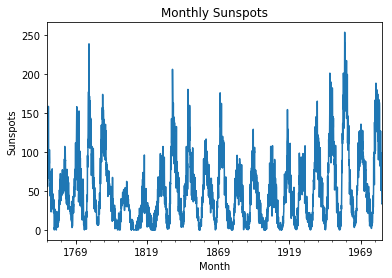

In [25]:
serie = serie.astype(float)
serie.plot()
plt.title('Monthly Sunspots')
plt.ylabel('Sunspots')
plt.xlabel('Month')
plt.show()